# Projet Advanced Machine Learning 2
#### Projet réalisé par Marie-Absa Ndiaye et Chloé Trovoada

Le but de ce projet est de générer une synthèse des données créées par les citoyens français pour répondre à une question politique. 
La question à laquelle nous essayons de répondre est d'ordre écologique.

## Pré-traitements

Bouton pour afficher ou non les warnings (messages sur fond rose)

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Chargement des données

In [2]:
%matplotlib inline

# Upload data
import pandas as pd
data = pd.read_csv("/Users/chloetrvd/Documents/ESILV/ADVANCED MACHINE LEARNING/PROJET/PROJET 2/LA_TRANSITION_ECOLOGIQUE.csv", sep=',', low_memory=False)
data.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,...,"QUXVlc3Rpb246MTUw - Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",QUXVlc3Rpb246MTUx - Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"QUXVlc3Rpb246MTUy - Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","QUXVlc3Rpb246MTUz - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","QUXVlc3Rpb246MTU0 - Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","QUXVlc3Rpb246MTU1 - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","QUXVlc3Rpb246MjA3 - Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",QUXVlc3Rpb246MTU3 - Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,QUXVlc3Rpb246MTU4 - Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,QUXVlc3Rpb246MTU5 - Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?
0,UHJvcG9zYWw6ZmZlN2MwNzktMWUyMC0xMWU5LTk0ZDItZm...,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,False,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques
1,UHJvcG9zYWw6M2RmZmUxZjMtMWUyMS0xMWU5LTk0ZDItZm...,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...
2,UHJvcG9zYWw6NDg1YWUxYjItMWUyMS0xMWU5LTk0ZDItZm...,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,False,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,"développer les transports en commun ,",NaN,Non,NaN,Oui,NaN,Les transports en commun|L'auto partage|Le tra...,NaN,NaN,NaN
3,UHJvcG9zYWw6NTk2Nzk5MmItMWUyMS0xMWU5LTk0ZDItZm...,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,False,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,Plus de transports publics dans les petites co...,Non,NaN,Non,Le co-voiturage ne correspond pas toujours aux...,Les transports en commun,L'Etat,Elle n'a aucun pouvoir. Impossible de contrain...,NaN
4,UHJvcG9zYWw6ODU5NWMyOTYtMWUyMS0xMWU5LTk0ZDItZm...,2-8,Economie vs Ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,NaN,False,NaN,VXNlcjo3M2YxN2NlZS0xZDRiLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,"Aménagement de piste cyclable, développement d...","Détaxer le mode de chauffage écologique, une a...",Oui,une aide significative pour de l'éolien ou du ...,Non,Une piste cyclable pour éviter de risquer ma v...,Les transports en commun|Le covoiturage|Le vélo,"La commune, le département, la région",Demander à Nicolas Hulot,Une vrai politique écologique et non économique


Suppression des questions non traitées.

In [3]:
data = data.drop(data.columns[[12, 13, 14, 15, 16, 18, 20, 25]], axis=1)  # df.columns is zero-based pd.Index 
data.columns = ['id', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt', 'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode', 'Q1', 'Q7', 'Q9','Q11','Q12','Q13','Q14','Q16']

### Traitement des NA

Il faut dans un premier temps traiter les NA, pour cela on les remplace par des X car nous allons par la suite enlever les casses et l'ordinateur ne comprendra plus que se sont des NaN (nan)

In [4]:
data = data.fillna("X")

### Normalisation du texte

Il faut dans un second temps mettre l'ensemble du texte en minuscule car les traitements effectués par la suite sont sensibles à la casse

In [5]:
data = data.apply(lambda x: x.astype(str).str.lower())

In [6]:
data.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,Q1,Q7,Q9,Q11,Q12,Q13,Q14,Q16
0,uhjvcg9zyww6zmzln2mwnzktmwuymc0xmwu5ltk0zditzm...,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,x,false,x,vxnlcjoxmtqwmtc0ys0xztfmltexztktotrkmi1myte2m2...,citoyen / citoyenne,97231,x,x,x,x,x,x,x,multiplier les centrales géothermiques
1,uhjvcg9zyww6m2rmzmuxzjmtmwuyms0xmwu5ltk0zditzm...,2-5,la surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,x,false,x,vxnlcjpjowyxzwq1ns0xyzewltexztktotrkmi1myte2m2...,citoyen / citoyenne,57000,les problèmes auxquels se trouve confronté l’e...,x,x,x,x,x,x,les problèmes auxquels se trouve confronté l’e...
2,uhjvcg9zyww6ndg1ywuxyjitmwuyms0xmwu5ltk0zditzm...,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,x,false,x,vxnlcjozzjlhnzawos0xytc2ltexztktotrkmi1myte2m2...,citoyen / citoyenne,34140,"les dérèglements climatiques (crue, sécheresse)","développer les transports en commun ,",non,oui,x,les transports en commun|l'auto partage|le tra...,x,x
3,uhjvcg9zyww6ntk2nzk5mmitmwuyms0xmwu5ltk0zditzm...,2-7,pollution air eau,2019-01-22 09:40:19,2019-01-22 09:40:19,x,false,x,vxnlcjozowqwnzjjnc0xzdewltexztktotrkmi1myte2m2...,citoyen / citoyenne,17400,la pollution de l'air,x,non,non,le co-voiturage ne correspond pas toujours aux...,les transports en commun,l'etat,x
4,uhjvcg9zyww6odu5nwmyotytmwuyms0xmwu5ltk0zditzm...,2-8,economie vs ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,x,false,x,vxnlcjo3m2yxn2nlzs0xzdriltexztktotrkmi1myte2m2...,citoyen / citoyenne,35430,la biodiversité et la disparition de certaines...,"aménagement de piste cyclable, développement d...",oui,non,une piste cyclable pour éviter de risquer ma v...,les transports en commun|le covoiturage|le vélo,"la commune, le département, la région",une vrai politique écologique et non économique


## Tokenisation

In [7]:
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem.snowball import FrenchStemmer
#from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

stops = set(stopwords.words("french"))
tokenizer = WordPunctTokenizer()

In [8]:
def remove_stops(my_list):
    newStopWords = ['tout','tous','toute','toutes','etc','ci','ca','fois','plus']
    stops.update(newStopWords)
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)


def french_stemmer(my_list):
    stemming = FrenchStemmer()
    stemming_words = [stemming.stem(w) for w in my_list]
    return (stemming_words)

def singular(my_list):
    stemming = RegexpStemmer('s$')
    stemming_words = [stemming.stem(w) for w in my_list]
    return (stemming_words)

## pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git
#def french_lemmatizer(my_list):
#    lemmatizer = FrenchLefffLemmatizer()
#    lemmatizer_words = [lemmatizer.lemmatize(w) for w in my_list]
#    return (lemmatizer_words)

## Modifier le type de variable qu'on garde car trop long et inutile.
def clean_sentence(sentence):
    Words_Final = ""
    TagToken = nltk.pos_tag(sentence)
    for i in range(len(TagToken)):
        sentence = TagToken[i]
        if not (sentence[1] == 'ADP' or sentence[1] == 'CONJ' or sentence[1] == 'PRON'
                or sentence[1]=='VERB' or sentence[1]==':' or sentence[1]==',' or sentence[1]=='-' or sentence[1]=='(' or sentence[1]==')'):
                Words_Final = Words_Final + sentence[0] + " "
    return Words_Final

### Supression de la ponctuation

A présent on enlève tous signe de ponctuation et accent car ils sont inutiles à notre analyse

In [9]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

new_data = data.copy()

for i in range(11,19):
    #print(i)
    new_data.iloc[:,i] = new_data.apply(lambda row: tokenizer.tokenize(row[i]), axis=1)
    new_data.iloc[:,i] = new_data.apply(lambda row: remove_stops(row[i]), axis=1)
    new_data.iloc[:,i] = new_data.apply(lambda row: singular(row[i]), axis=1)
    new_data.iloc[:,i] = new_data.apply(lambda row: TreebankWordDetokenizer().detokenize(row[i]), axis=1)

# Suppression des accents
new_data = new_data.apply(lambda x: x.astype(str).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

#Suppression de la ponctuation.
new_data = new_data.apply(lambda x: x.astype(str).str.replace('[^\w\s]',''))


new_data.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,Q1,Q7,Q9,Q11,Q12,Q13,Q14,Q16
0,uhjvcg9zyww6zmzln2mwnzktmwuymc0xmwu5ltk0zditzm...,24,transition ecologique,20190122 093749,20190122 093749,x,false,x,vxnlcjoxmtqwmtc0ys0xztfmltexztktotrkmi1myte2m2...,citoyen citoyenne,97231,x,x,x,x,x,x,x,multiplier centrale geothermique
1,uhjvcg9zyww6m2rmzmuxzjmtmwuyms0xmwu5ltk0zditzm...,25,la surpopulation,20190122 093933,20190122 093933,x,false,x,vxnlcjpjowyxzwq1ns0xyzewltexztktotrkmi1myte2m2...,citoyen citoyenne,57000,probleme auxquel trouve confronte ensemble pl...,x,x,x,x,x,x,probleme auxquel trouve confronte ensemble pl...
2,uhjvcg9zyww6ndg1ywuxyjitmwuyms0xmwu5ltk0zditzm...,26,climat,20190122 093950,20190122 093950,x,false,x,vxnlcjozzjlhnzawos0xytc2ltexztktotrkmi1myte2m2...,citoyen citoyenne,34140,dereglement climatique crue secheresse,developper transport commun,non,oui,x,transport commun auto partage transport demande,x,x
3,uhjvcg9zyww6ntk2nzk5mmitmwuyms0xmwu5ltk0zditzm...,27,pollution air eau,20190122 094019,20190122 094019,x,false,x,vxnlcjozowqwnzjjnc0xzdewltexztktotrkmi1myte2m2...,citoyen citoyenne,17400,pollution air,x,non,non,co voiturage correspond toujour demande lieu...,transport commun,etat,x
4,uhjvcg9zyww6odu5nwmyotytmwuyms0xmwu5ltk0zditzm...,28,economie vs ecologie,20190122 094133,20190122 094133,x,false,x,vxnlcjo3m2yxn2nlzs0xzdriltexztktotrkmi1myte2m2...,citoyen citoyenne,35430,biodiversite disparition certaine espece,amenagement piste cyclable developpement covoi...,oui,non,piste cyclable eviter risquer vie allant trava...,transport commun covoiturage velo,commune departement region,vrai politique ecologique non economique


## Analyse non supervisée

### LDA sur la question 1

Q1: Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

tfidf = tfidf_vectorizer.fit_transform(new_data.iloc[:,11])

In [11]:
tfidf.shape

(87562, 1000)

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [13]:
lda.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [14]:
tf_feature_names = tfidf_vectorizer.get_feature_names()
tf_feature_names[100:103]

['biologique', 'boi', 'bon']

In [15]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[- n_top_words - 1:][::-1]]))
    print()

In [16]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
reponse autre aussi probleme question liee lie choisir entre donc globale
Topic #1:
pesticide plastique environnement surconsommation produit agriculture gaspillage sante production pollution dechet
Topic #2:
planete etre probleme humaine environnement surpopulation homme vie faire important cause
Topic #3:
important lie probleme ensemble point energie cite car consommation nucleaire transition
Topic #4:
disparition certaine espece biodiversite nombreuse dereglement climatique souffrance vegetale entrainent migration
Topic #5:
eau pollution sol terre air ressource ocean mer nature energetique naturelle
Topic #6:
rechauffement dessu proposition quatre climatique transport manque consequence prendre systeme phenomene
Topic #7:
air pollution decharge biodiversite ordre dereglement climatique culture premier provoque partie
Topic #8:
crue secheresse dereglement climatique seulement biodiversite chaleur ordre periode augmenter catastrophe
Topic #9:
erosion dechet littoral gestion 

In [17]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [18]:
pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.029147 -0.335532       1        1  23.320677
4     -0.014034 -0.115777       2        1  17.263524
7     -0.325497  0.127843       3        1  11.953110
2      0.217649  0.167009       4        1  10.682862
0      0.198770 -0.018389       5        1   7.251451
1     -0.050558  0.174924       6        1   6.736854
5     -0.274198  0.053079       7        1   6.026614
9     -0.043050  0.042243       8        1   6.022685
3      0.258323  0.145593       9        1   5.802242
6      0.061742 -0.240992      10        1   4.939981, topic_info=    Category          Freq         Term         Total  loglift  logprob
36   Default   9812.000000          air   9812.000000  30.0000  30.0000
722  Default  10182.000000    pollution  10182.000000  29.0000  29.0000
219  Default   9061.000000         crue   9061.000000  28.0000  28.0000
856  Default   9059.000000   secheresse   9059.000000  27.0000  27.0000
128  Default   6659.000000     certaine   6659.000000  26.0000  26.0000
..       ...           ...          ...           ...      ...      ...
778  Topic10    526.787399  proposition    667.235410   2.7715  -2.6723
187  Topic10    273.981609  consequence    364.209900   2.7231  -3.3261
178  Topic10    117.483133       compte    181.432694   2.5732  -4.1728
616  Topic10     75.934282       niveau    135.451618   2.4291  -4.6093
162  Topic10    330.859706   climatique   9418.519855  -0.3409  -3.1374

[486 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         4  0.914266        30
7         5  0.968919   abeille
8         4  0.940471     abord
9         5  0.993289   absence
18        4  0.991353    action
...     ...       ...       ...
978       4  0.372154     ville
978       8  0.623357     ville
981       4  0.943247  visuelle
984       9  0.986651    vivant
992       4  0.969648      vont

[434 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 8, 3, 1, 2, 6, 10, 4, 7])

### Analyse des questions fermées


#### Affichage des donnéees

Q11: Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?


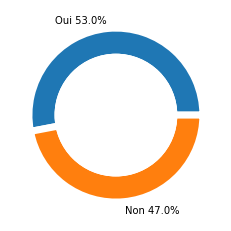

In [19]:
import matplotlib.pyplot as plt

# Question 11
print("Q11: Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?")

# create data
part_oui=(new_data['Q11']=="oui").value_counts()
part_non=(new_data['Q11']=="non").value_counts()

total=part_oui[1]+part_non[1]

pourcent_oui=round(part_oui[1]/total*100)
pourcent_non=round(part_non[1]/total*100)

names='Oui '+str(pourcent_oui)+ "%", 'Non '+ str(pourcent_non)+ "%"

size=[pourcent_oui,pourcent_non]
#print(size)


# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Label distance: gives the space between labels and the center of the pie
p=plt.gcf()
p.gca().add_artist(my_circle)
 
# Label color
plt.rcParams['text.color'] = 'black'

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Prévision de résultats

Notre base de données possède la questions suivante:

Q11: Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport Ã  la demande, le vélo, etc.

Deux réponses sont alors possibles, oui et non. Celles-ci sont justifiés juste après avec les réponses aux questions suivantes:
Q12: Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?
Q13: Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?

Nous voulons regrouper les questions 12 et 13 afin de prédire les réponses à la Q11 en fonction des justificatifs.

In [20]:
#Création de la data
data_prev = new_data[['Q11','Q12','Q13']].copy()

#On concatène
data_prev['Q12'] = data_prev['Q12'] + " " + data_prev['Q13']

#Suppression Q13
data_prev = data_prev.drop(columns=['Q13'])

#Renommer
data_prev.columns =['Reponses','Justifications']

#On tronque le fichier
nb_ligne = data_prev.Reponses.count()
#data_prev= data_prev.drop(data_prev[data_prev.iloc[1:3,:]].index)

#On drop les réponses différentes de oui ou non 
data_prev = data_prev.drop(data_prev[(data_prev.iloc[:,0] != 'oui') & (data_prev.iloc[:,0] != 'non')].index)
        
data_prev.head()



,Reponses,Justifications
2,oui,x transport commun auto partage transport de...
3,non,co voiturage correspond toujour demande lieu...
4,non,piste cyclable eviter risquer vie allant trava...
5,oui,mettre disposition vehicule electrique locatio...
6,non,construire ligne chemin fer mettre navette dis...


In [21]:
data_prev.iloc[4,0]

'non'

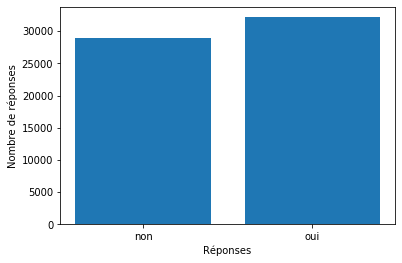

In [22]:
#Analyse de la data
Sentiment_count=data_prev.groupby('Reponses').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Justifications'])
plt.xlabel('Réponses')
plt.ylabel('Nombre de réponses')
plt.show()

#print(data_prev['Reponses'])

In [23]:
answers = []
texts = []

answers = data_prev['Reponses'].tolist()
texts = data_prev['Justifications'].tolist()

Equilibrer la data

In [24]:
from collections import Counter
 
def balance_classes(xs, ys):
    # xs = justifications à la question
    # ys = réponse
    
    freqs = Counter(ys)

    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    
    return new_xs, new_ys

In [25]:
print(Counter(answers))
balanced_x, balanced_y = balance_classes(texts, answers)
print(Counter(balanced_y))

Counter({'oui': 32160, 'non': 28982})
Counter({'oui': 28982, 'non': 28982})


On vectorise le texte pour que se soit beaucoup plus rapide à l'aide de TF-IDF

In [26]:
from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.now()

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)
print(datetime.now() - t1)

0:00:01.700196


Création d'un train et d'un test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

On teste du SVM dessus

In [28]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:00:00.408473


On prédit les 10 premières lignes

In [29]:
#Predicting the first 10 reviews
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

['oui', 'non', 'oui', 'oui', 'non', 'oui', 'oui', 'non', 'non', 'oui']
['oui', 'non', 'non', 'oui', 'non', 'oui', 'oui', 'non', 'oui', 'non']


Observons ce que cela donne

In [30]:
print("Justifications à la question : ", texts[0])
print("Réponse : ", y_test[0])
print("Réponse prédite : ", preds[0])
print("\n")
print("Justifications à la question : ", texts[4])
print("Réponse : ", y_test[4])
print("Réponse prédite : ", preds[4])

Justifications à la question :  x transport commun  auto partage  transport demande
Réponse :  oui
Réponse prédite :  oui


Justifications à la question :  construire ligne chemin fer mettre navette disposition maniere beaucoup reguliere transport commun  covoiturage  auto partage  transport demande  velo
Réponse :  non
Réponse prédite :  non


On vérifie l'accuracy du modèle

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         non       0.79      0.75      0.77      9508
         oui       0.77      0.80      0.78      9621

    accuracy                           0.78     19129
   macro avg       0.78      0.78      0.78     19129
weighted avg       0.78      0.78      0.78     19129



On remarque qu'on a une accuracy de 78%

Après avoir effectuer l'analyse on se rend compte que les deux questions sur lesquelles on a basé celle-ci se ne sont pas foncièrement différentes. 
Q12: Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?
Q13: Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?

En effet, dans les deux cas elles demandent les solutions déjà mises en place ou à mettre en place.
Notre étude aurait été grandement plus interessantes si les questions poussaient à  comprendre les raisons de la personne sondée et non chercher uniquement où s'améliorer.

### Analyse des tendances par groupement

Nous pouvons néanmoins voir quelles sont les solutions alternatives, mises en place ou non, proposées.

In [32]:
#On enlève les mots inutiles

#Bi-gram
#Enlever les chiffres
#data_prev.iloc[:,1] = data_prev.str.replace('\d+', '')

import re

def remove_number(my_list):
    string_no_numbers = [re.sub("\d+", "", w) for w in my_list]
    #string_no_numbers = re.sub("\d+", "", str)
    return(string_no_numbers)

def delete_words(my_list):
    meaningful_words = [w for w in my_list if not w in word_delete]
    return (meaningful_words)

## Modifier le type de variable qu'on garde car trop long et inutile.
def clean_sentence(sentence):
    Words_Final = ""
    TagToken = nltk.pos_tag(sentence)
    for i in range(len(TagToken)):
        sentence = TagToken[i]
        if not (sentence[1] == 'VERB'):
                Words_Final = Words_Final + sentence[0] + " "
    return Words_Final

#regroupement nécessaire

word_delete = ['x',' ','correpond','toujours','demande','prendre','travail','petits','grands','km','m','h','paris','banlieue','ni','leur','dont','aussi','important','co','car','ligne','depui']
#stops

data_prev.iloc[:,1] = data_prev.apply(lambda row: tokenizer.tokenize(row[1]), axis=1)
data_prev.iloc[:,1] = data_prev.apply(lambda row: remove_number(row[1]), axis=1)
data_prev.iloc[:,1] = data_prev.apply(lambda row: delete_words(row[1]), axis=1)
data_prev.iloc[:,1] = data_prev.apply(lambda row: remove_stops(row[1]), axis=1)
#data_prev.iloc[:,1] = data_prev.apply(lambda row: clean_sentence(row[1]), axis=1)
data_prev.iloc[:,1] = data_prev.apply(lambda row: TreebankWordDetokenizer().detokenize(row[1]), axis=1)



data_prev.head()

<>:10: DeprecationWarning: invalid escape sequence \d
<>:10: DeprecationWarning: invalid escape sequence \d
<>:10: DeprecationWarning: invalid escape sequence \d
<ipython-input-32-e1878dc5d524>:10: DeprecationWarning: invalid escape sequence \d
  string_no_numbers = [re.sub("\d+", "", w) for w in my_list]


,Reponses,Justifications
2,oui,transport commun auto partage transport
3,non,voiturage correspond toujour lieux desserte lo...
4,non,piste cyclable eviter risquer vie allant trava...
5,oui,mettre disposition vehicule electrique locatio...
6,non,construire chemin fer mettre navette dispositi...


In [33]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

#Regroupons d'abord les mots
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Justifications']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data_prev)     

corpus[0:2]

/opt/anaconda3/lib/python3.7/site-packages/botocore/awsrequest.py:624: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class HeadersDict(collections.MutableMapping):
/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[['transport', 'commun', 'auto', 'partage', 'transport'],
 ['voiturage',
  'correspond',
  'toujour',
  'lieux',
  'desserte',
  'loin',
  'centre',
  'ville',
  'transport',
  'commun']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will b

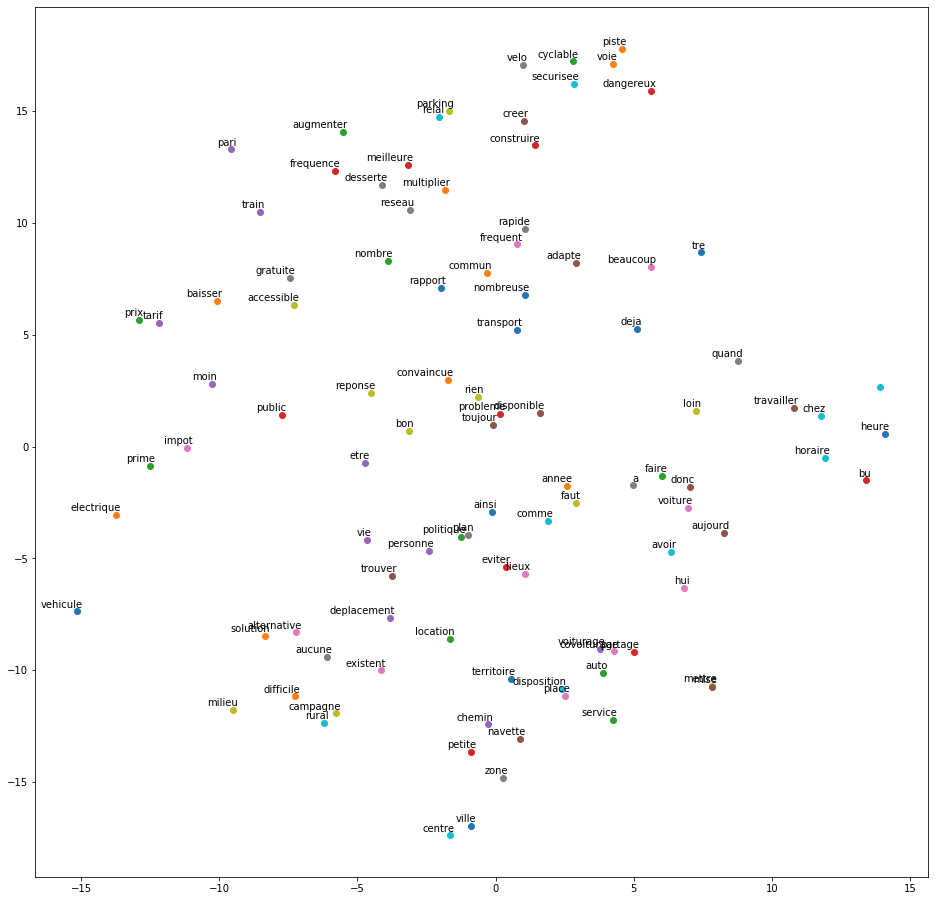

In [34]:
#On base le model sur les transports

model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['transport']

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(100):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


tsne_plot(model)

### Étude de la question 14
Voyons voir également selon les personnes sondées qui doit se charger de proposer des solutions alternatives à la voiture individuelle soit, la réponse à la question 14.
Nous allons utiliser la librairie TextBlob dans le but de voir s’il y a une relation entre la polarité et la subjectivité.

In [35]:
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #Will Explain Later

In [36]:
data_Q14 = new_data[['publishedAt','Q14']].copy()

#On drop les lignes vides
data_Q14 = data_Q14.drop(data_Q14[data_Q14.iloc[:,1] == 'x'].index)

COLS = ['date','text', 'sentiment','subjectivity','polarity']
sentiment_Q14 = pd.DataFrame(columns=COLS)

In [37]:
for index, row in islice(data_Q14.iterrows(), 0, None):

     new_entry = []
     text_lower = row['Q14']
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment

     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity

     new_entry += [row['publishedAt'],text_lower,sentiment,subjectivity,polarity]
        
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     sentiment_Q14 = sentiment_Q14.append(single_survey_sentimet_df, ignore_index=True)

sentiment_Q14.head()

,date,text,sentiment,subjectivity,polarity
0,20190122 094019,etat,"(0.0, 0.0)",0.0,0.0
1,20190122 094133,commune departement region,"(0.0, 0.0)",0.0,0.0
2,20190122 094208,etat collectivite territoriale entreprise privee,"(0.0, 0.0)",0.0,0.0
3,20190122 094348,gouvernement accord municipalite conseil depar...,"(0.0, 0.0)",0.0,0.0
4,20190122 094425,collectivite locale,"(0.0, 0.0)",0.0,0.0


In [38]:
sentiment_Q14.describe()

,subjectivity,polarity
count,61560.000000,61560.000000
mean,0.042916,0.008974
std,0.170361,0.080949
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Comme vous pouvez le voir, la valeur de 50 % signifie que la médiane est de zéro (0). Sur 61560 enregistrements, j'obtiens la valeur médiane = zéro et 3e quartile = 0 car j'ai trop de rétroactions neutres qui affecteront la précision de notre analyse. Je vais donc trouver des lignes avec des valeurs non nulles dans un sous-ensemble de colonnes dans le cadre de données des pandas.
Pour ce faire, j'utilise une solution alternative qui utilise la méthode select_dtypes() :

In [39]:
sentiment_Q14_filter = sentiment_Q14.loc[(sentiment_Q14.loc[:, sentiment_Q14.dtypes != object] != 0).any(1)]

In [40]:
sentiment_Q14_filter.describe()

,subjectivity,polarity
count,6291.000000,6291.000000
mean,0.419950,0.087811
std,0.354513,0.239180
min,0.000000,-1.000000
25%,0.066667,0.000000
50%,0.375000,0.000000
75%,0.683333,0.200000
max,1.000000,1.000000


Par conséquent, sur 61560 commentaires de clients, notre analyse a détecté 57728 polarités neutres (la polarité est 0), ces enregistrements ont été supprimés pour obtenir des résultats plus précis. Par conséquent, ces résultats sont basés sur les 3832 commentaires restants pour la question 14.

### Tracés
1. BOX PLOT
Créons un diagramme en boîte comme première étape de notre analyse de la parcelle. (Nous utilisons le cadre de données de dffilter à partir de maintenant)

Text(0, 0.5, 'Range')

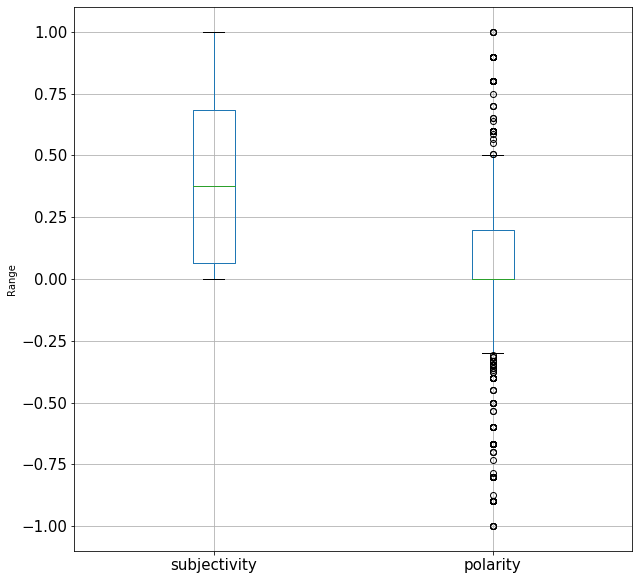

In [41]:
#boxplot for dffilter
boxplot = sentiment_Q14_filter.boxplot(column=['subjectivity','polarity'], fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

2. SCATTER PLOT

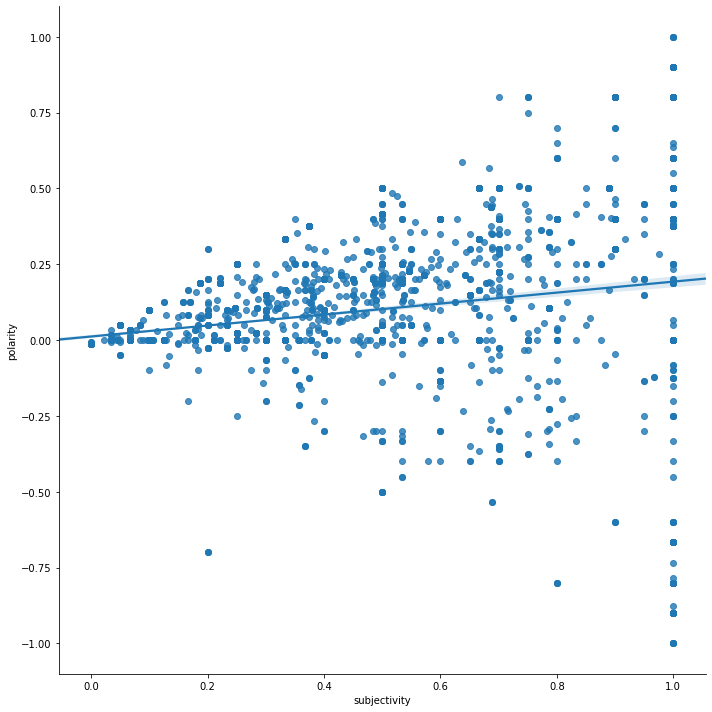

In [42]:
#scatter for dffilter
import seaborn as sns
sns.lmplot(x='subjectivity',y='polarity',data=sentiment_Q14_filter,fit_reg=True,scatter=True, height=10,palette="mute") 

Le diagramme de dispersion est utilisé pour trouver la covariance et la corrélation entre deux variables. Ce diagramme vous aide à déterminer dans quelle mesure les deux variables sont étroitement liées. Après avoir déterminé la corrélation entre les variables, vous pouvez ensuite prédire le comportement de la variable dépendante en fonction de la mesure de la variable indépendante.

#### Covariance
La covariance indique comment deux variables sont liées (dans notre cas, il s'agit de la subjectivité et de la polarité). Une covariance positive signifie que les variables sont liées positivement et qu'elles se déplacent dans la même direction, tandis qu'une covariance négative signifie que les variables sont inversement liées et qu'elles se déplacent dans des directions opposées.

#### Corrélation
La corrélation est une autre façon de déterminer comment deux variables sont liées. En plus de vous indiquer si les variables sont liées positivement ou inversement, la corrélation vous indique également le degré auquel les variables ont tendance à évoluer ensemble.
Calculons la Covariance et la Corrélation avec Python !

In [43]:
# covariance and correlation for dffilter
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = sentiment_Q14_filter['subjectivity']
data2 = data1 + sentiment_Q14_filter['polarity']

# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.12567923 0.14841266]
 [0.14841266 0.22835308]]
Pearsons correlation: 0.87606


La covariance entre les deux variables est positive, ce qui suggère que les variables changent dans le même sens que nous le prévoyons.

Nous pouvons voir que les deux variables sont corrélées positivement. Cela suggère un niveau élevé de corrélation (valeur supérieure à 0,5 et proche de 1,0).

En conclusion, nous pouvons dire que les deux variables sont corrélées positivement.
Le graphique montre une corrélation positive entre la Subjectivité et la Polarité.
C'est-à-dire que plus la subjectivité augmente, plus la polarité de la réponse augmente aussi, ou en d'autres termes, plus les sentiments exprimés sont forts, plus le commentaire global est subjectif.

3. DISTRIBUTION DE LA POLARITÉ ET COURBE DE DENSITÉ

La distribution de la polarité décrit toutes les valeurs de la variable Polarité dans une plage donnée. Cette plage sera délimitée entre les valeurs minimales et maximales possibles (-1 à +1 dans notre cas). En examinant la distribution, nous pouvons identifier comment la polarité est distribuée parmi les clients et les facteurs clés comme la moyenne, la médiane et l'écart-type.
La distribution la plus courante est la distribution normale ou " courbe de Bell ", mais il est important de noter qu'une distribution normale est concentrée au centre et diminue de chaque côté.
Passons à notre code python pour voir ce qu'il y a derrière le code.

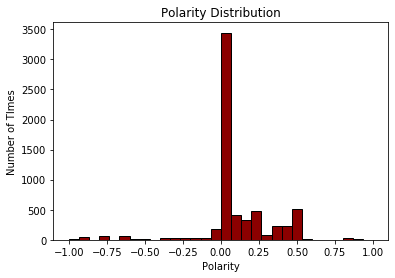

In [44]:
#Polarity Distribution for dffilter

plt.hist(sentiment_Q14_filter['polarity'], color = 'darkred', edgecolor = 'black', density=False, bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

Voici comment afficher la courbe de densité dessus.

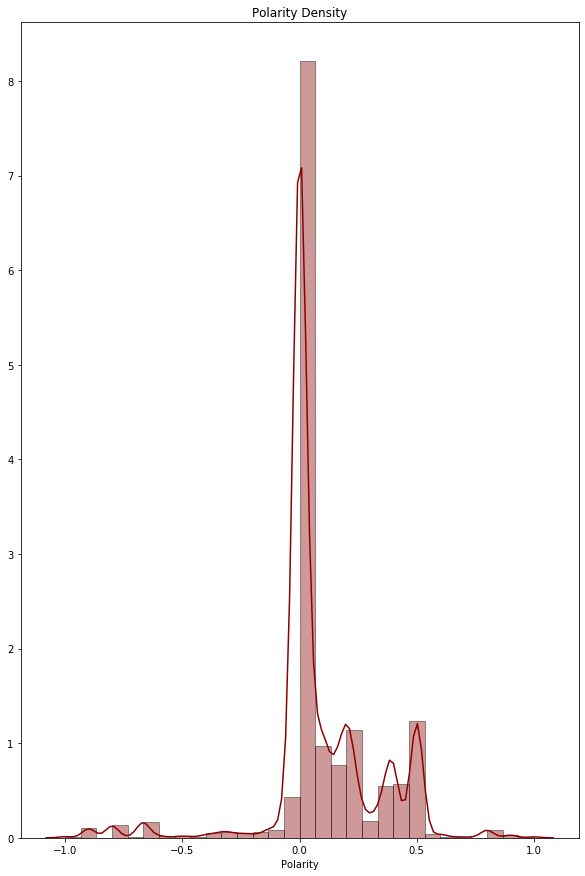

In [45]:
sns.distplot(sentiment_Q14_filter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

4. MOTS FREQUENTS

Souvent, nous voulons savoir quels mots sont les plus courants dans les enquêtes, car nous cherchons des modèles. Étant donné l'ensemble des données, nous pouvons trouver k mots les plus fréquents avec le traitement du langage naturel (NLP) en utilisant Python.

In [46]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(sentiment_Q14.text).most_common(10), columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
region,2093
etat,1934
commune,1612
collectivite locale,1290
mairie,952
departement,942
collectivite territoriale,789
,654
collectivite,584


Résultats de l'analyse


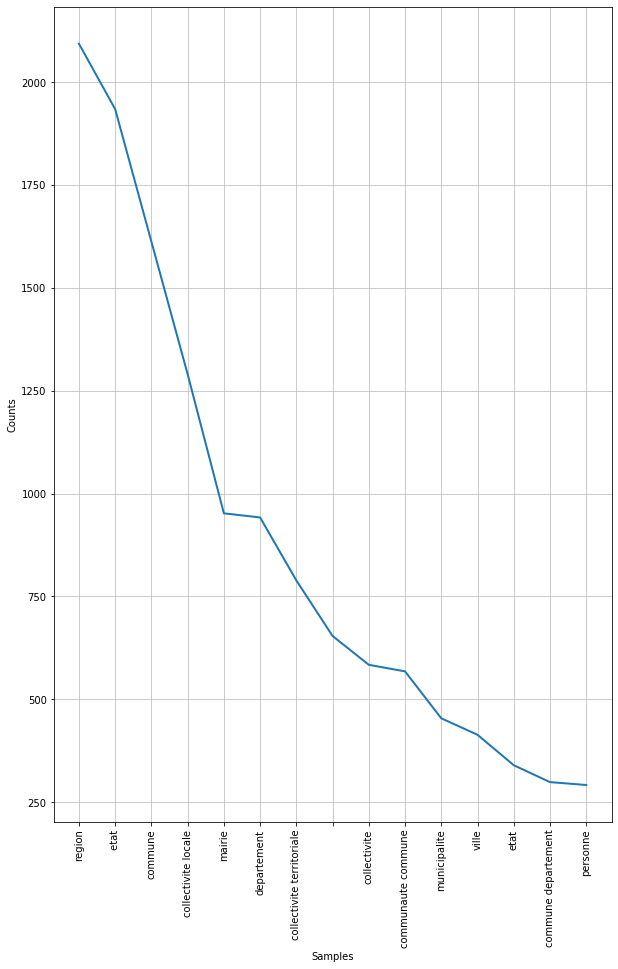

In [47]:
from nltk import FreqDist

print("Résultats de l'analyse")
Freq = FreqDist(data_Q14.iloc[:,1])
Freq.plot(15)

5. WORDCLOUD

Souvent, vous avez pu voir un nuage rempli de beaucoup de mots de différentes tailles, qui représentent la fréquence ou l'importance de chaque mot. C'est ce qu'on appelle le Nuage de mots.

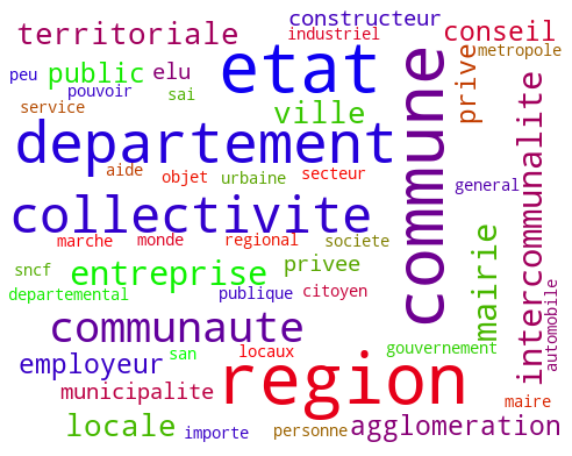

<Figure size 720x720 with 0 Axes>

In [48]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

rslt_wordcloud = pd.DataFrame(Counter(sentiment_Q14.text).most_common(100),columns=['Word', 'Frequency'])

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

## 3. Correlations with announcements

Voici le lien utilisé pour les annonces de Macron: https://www.reddit.com/r/france/comments/bhb76w/r%C3%A9sum%C3%A9_des_annonces_demmanuel_macron/

Macron n'ayant répondu à aucunes des questions au sujet de l'écologie il n'y a pas de corrélation dessus.

Pour cette partie, nous avons donc pris un autre grand thème et importé une nouvelle base de donnée: celle sur la démocratie et la citoyenneté.

### Résumé de la base de donnée "La démocratie et la citoyenneté" en 5 étapes

In [49]:
data_democratie = pd.read_csv("/Users/chloetrvd/Documents/ESILV/ADVANCED MACHINE LEARNING/PROJET/PROJET 2/DEMOCRATIE_ET_CITOYENNETE.csv", sep=',', low_memory=False)
data_democratie = data_democratie.drop(data_democratie.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 28, 29, 41, 42, 44]], axis=1)

In [50]:
text = []
colonne = data_democratie.iloc[:,1]

for j in range(1, 22):
    colonne = data_democratie.iloc[:,j]
    for i in range(1,500):
        if colonne[i] != "x":
            text.append(str(colonne[i]))

separator = " "
text_democratie = separator.join(text)

import re
text_democratie = re.sub(r'[^\w\s{.}{-}{?}]','',text_democratie)
text_democratie = re.sub(r'\t','',text_democratie)
text_democratie = re.sub(r'nan','',text_democratie)

1. Créer le tableau de fréquence des mots
Nous créons un dictionnaire pour la table de fréquence des mots à partir du texte.

In [51]:
def _create_frequency_table(text_string) -> dict:
    ps = PorterStemmer()
    freqTable = dict()
    for word in text_string:
        word = ps.stem(word)
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
    return freqTable

In [52]:
freq_table = _create_frequency_table(text_democratie)

2. Tokenizer les phrases
Ensuite, nous divisons la text_string en un ensemble de phrases. Pour cela, nous utiliserons la méthode intégrée de la nltk. 

In [53]:
sentences = sent_tokenize(text_democratie)

3. Noter les phrases : Fréquence des termes
Nous utilisons la méthode de la Fréquence des Termes pour noter chaque phrase.

In [54]:
def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

In [55]:
sentence_scores = _score_sentences(sentences, freq_table)

Notez qu'un problème potentiel avec notre algorithme de score est que les phrases longues auront un avantage sur les phrases courtes. 
Pour résoudre ce problème, nous divisons le score de chaque phrase par le nombre de mots de la phrase.
Notez qu'ici la phrase [:10] représente les 10 premiers caractères de n'importe quelle phrase, ceci est pour économiser de la mémoire tout en sauvegardant les touches du dictionnaire.

4. Trouver le seuil
Ici, nous considérons le score moyen des phrases comme un seuil.

In [56]:
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Valeur moyenne d'une phrase du texte original
    average = int(sumValues / len(sentenceValue))

    return average

In [57]:
threshold = _find_average_score(sentence_scores)

5. Générer le résumé
Algorithme de base : Sélectionnez une phrase pour le résumé, si la note de la phrase est supérieure à la note moyenne

In [58]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [59]:
summary = _generate_summary(sentences, sentence_scores, 1.5 * threshold)

In [60]:
print(summary)

 Que constatonsnous ? GrandEst  16millions de dépenses . Une chambre des référendums par département serait raisonnable. Cest la démocratie  Arrêtez de confisquer le pouvoir  De Gaule avait tort. La dictature de la majorité est une honte. Modifier profondément les procédures de vote au Parlement. Commencer par obliger les élus à simpliquer dans léducation civique et citoyenne des élèves dès le plus jeune âge. permettant de traiter ? Passer dun régime présidentiel à un régime beaucoup moins vertical. Les enveloppes vides sont assimilées à un vote blanc. Périmètre dapplication  pour toutes les élections à tous les tours. Création dune Assemblée citoyenne tirée au sort avec rotation régulière pour contrebalancer le pouvoir de lexécutif et des 2 assemblées existantes nationale et Sénat. Je suis pour une proportionnel intégrale de lassemblée national et la suppression du sénat arrêter dêtre méprisant à leur égard prendre en compte leurs demandes et demander aux technocrates du gouvernement 

Voici les annonces de Macron au sujet de la democratie et la citoyenneté :

- Emmanuel Macron veut "consolider la place des maires" dans la République.
- Limitation du nombre de mandats dans le temps
- Part de proportionnelle. Macron la souhaite entre 25 % et 30 %.
- Réduction du nombre de parlementaires
- Pas de vote obligatoire
- Pas de reconnaissance du vote blanc, qui n'est que "l'agrégation des refus"
- Pas de RIC, tel que proposé par les #GiletsJaunes, mais une refonte du référendum d'initiative partagée pour le simplifier et le rendre plus facile d'utilisation
- 1 million de signataires pour le RIC, création de référendum locals et renforcer droit de pétition
- "Il faut sans doute bien davantage de temps de délibération", dit Emmanuel Macron tout en réitérant son avis contre une "république référendaire" mais en défense de la "démocratie représentative".
- Renforcer le droit d'interpellation des élus, à l'échelle locale
- Réforme du Conseil éco, social et environnemental @lecese avec des citoyens "tirés au sort". Un "conseil de la participation citoyenne", avec des compétences de consultation.
- Toutes ces réformes seront dans une réforme constitutionnelle cet été. 150 citoyens seront tirés au sort dès juin, pour ce nouveau conseil.
- Pas de référundum sur ces actions : "Le choix que j'ai retenu est basé sur une méthode de concertation basée sur la démocratie participative, et non celle du référendum"

#### Globalement Macron a su répondre à certaines attentes des français concernant la démocratie et la citoyenneté